# Aprendizaje no supervisado - ALGORITMO JERARQUICO - HCA - CLUSTERING

Carga de librerías 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Carga del Dataset

In [2]:
dataset = pd.read_csv("./datasets/Mall_Customers.csv")

Asignamos a una variable los puntos de datos a analizar: los ingresos anuales y el índice de gastos por cliente. Esto se almacena en un array con los valores.

In [3]:
datapoints = dataset.iloc[:,[3,4]].values

Importamos algunas librerías más.

In [4]:
import scipy.cluster.hierarchy as hc  # Para la generación del dendrograma

from sklearn.cluster import AgglomerativeClustering # Para el algoritmo de Clustering Aglomerativo

Generamos un dendrograma usando la biblioteca scipy, empleando una conexión Ward para gestionarlo.

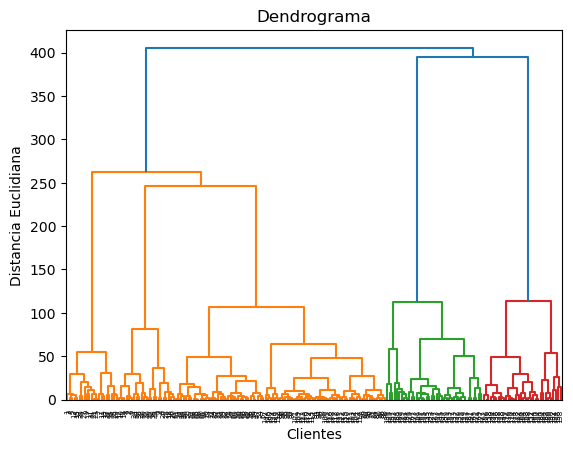

In [5]:
dend = hc.dendrogram(hc.linkage(datapoints,method = 'ward'))


plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

Dejando de lado el código, vamos a explicar un poco acerca del uso de los Dendrogramas.Los Dendrogramas nos darán los números recomendados de agrupaciones que queremos calcular para nuestro problema.  
¿Cómo podemos averiguar esto? Es tan simple como dibujar una línea paralela de modo que intercepte con el mayor número de líneas verticales, asegurándonos de no chocar con una línea horizontal o “punto de ramificación”.

![FOTO](./img/dendrograma.jpg)

Cuando dos agrupaciones se fusionan, el dendrograma las unirá en un nodo, cada nodo tiene una distancia vertical la cual puede ser interpretada como la longitud en el eje de las y.

Vemos que la intersección de las líneas con la mayor distancia, es decir, la mayor distancia de un nodo, marca 5 grupos diferentes, lo cual indica que nos recomienda cinco agrupaciones para el problema. Teniendo esto en cuenta, realizaremos el siguiente paso.


A continuación, usamos el algoritmo de agrupamiento aglomerativo, pasando como parámetros el número de grupos (según lo visto en el dendrograma), el método de cálculo de distancia y el criterio de conexión.   
Después asignamos los *datapoints* a un clúster

In [6]:
clust = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean',linkage = 'ward')

plot = clust.fit_predict(datapoints)

Realizamos el agrupamiento aglomerativo empleando el método de la distancia euclidiana y el mismo criterio de conexión.   
Nótese que le estamos pasando a nuestra función que queremos 5 grupos para este problema. A continuación, solo asignamos los datapoints al grupo correspondiente.  
Por último, vamos a programar nuestro diagrama de dispersión y asignar a cada grupo una etiqueta, según su índice de gasto y su ingreso anual.

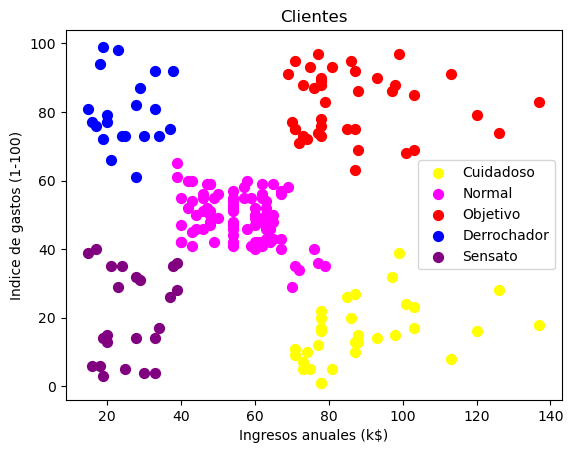

In [7]:
plt.scatter(datapoints[plot == 0,0], datapoints[plot == 0, 1], s = 50, c = 'yellow',label = 'Cuidadoso')
plt.scatter(datapoints[plot == 1,0], datapoints[plot == 1, 1], s = 50, c = 'magenta',label = 'Normal')
plt.scatter(datapoints[plot == 2,0], datapoints[plot == 2, 1], s = 50, c = 'red',label = 'Objetivo')
plt.scatter(datapoints[plot == 3,0], datapoints[plot == 3, 1], s = 50, c = 'blue',label = 'Derrochador')
plt.scatter(datapoints[plot == 4,0], datapoints[plot == 4, 1], s = 50, c = 'purple',label = 'Sensato')
plt.title('Clientes')
plt.xlabel('Ingresos anuales (k$)')
plt.ylabel('Indice de gastos (1-100)')
plt.legend()
plt.show()     


## ALGORITMO HDBSCAN - DBSCAN Jerárquico (Sobre Iris dataset)

Este algoritmo es una modificación del DBSCAN para que funcione de forma jerárquica, mezclando las ventajas de un algoritmo de agrupación basado en densidad con el método jerárquico.

In [23]:
# En el terminal: conda install -c conda-forge -y hdbscan

from sklearn.datasets import load_iris
from hdbscan import HDBSCAN


In [24]:
iris = load_iris()
X = iris.data
y = iris.target

# Disponemos de 3 especies distintas


In [25]:
model = HDBSCAN(min_samples=10, gen_min_span_tree=True)
y_hat = model.fit_predict(X)

Spanning Tree CPU


<Axes: >

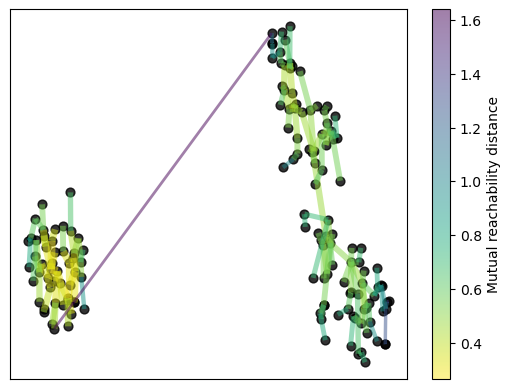

In [26]:
print("Spanning Tree CPU")
model.minimum_spanning_tree_.plot()

Se perciben claramente 2 clústers diferenciados.

Single_linkage_tree - Dendrogram


<Axes: ylabel='distance'>

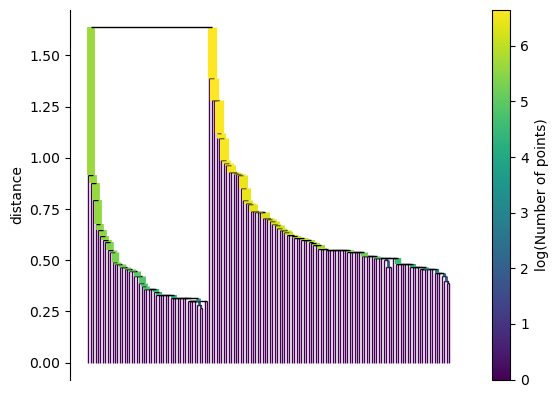

In [27]:
print("Single_linkage_tree - Dendrogram")
model.single_linkage_tree_.plot()

Condensed tree


<Axes: ylabel='$\\lambda$ value'>

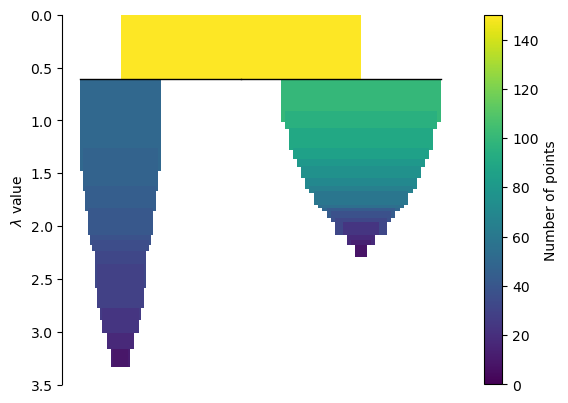

In [28]:
print("Condensed tree")
model.condensed_tree_.plot()

Se muestra, en este último gráfico, una simple separación en dos categorías. En base a estas variables, parece complicado separar las 'versicolor' y las 'virgínica'

## EJERCICIO ##
Aplicar los algoritmos anteriores sobre el dataset de cáncer de mama de Wisconsin. La variable objetivo se corresponde con la columna *'diagnosis'*, dónde una "B" nos indica que el tumor es BENIGNO y una "M" nos indica que es MALIGNO

In [34]:
import pandas as pd
df = pd.read_csv("./datasets/breast_cancer_Wisconsin.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
